# Bilbiotecas


In [1]:
import os
import re
import time
import string
import tempfile
import numpy as np
import pandas as pd
import statistics as st
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from datasets import load_dataset
from symspellpy import SymSpell, Verbosity
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Image
from reportlab.lib import colors
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import emoji
from sklearn.preprocessing import MinMaxScaler
import spacy
import pdfplumber
import fitz  
import contractions
from contractions import fix
from ftfy import fix_text
import wordninja
from deep_translator import GoogleTranslator
from tensorflow.keras.layers import SpatialDropout1D, LSTM, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GRU, Bidirectional
from spellchecker import SpellChecker
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, words as nltk_words,  wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pywsd.lesk import simple_lesk
from textblob import TextBlob
import nltk
import neattext as nt
import language_tool_python
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from scipy.stats import spearmanr, pearsonr, skew, kendalltau, norm
from statistics import mode, mean
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
import ast
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             f1_score, precision_score, recall_score, roc_auc_score, make_scorer)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight, compute_class_weight, compute_sample_weight
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from joblib import Parallel, delayed
import joblib
import spacy
 
from nltk.corpus import stopwords
import neattext.functions as nfx
import torch
from tensorflow.keras.initializers import HeNormal
from torch import nn
from torch.utils.data import DataLoader, Dataset
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
 
from language_tool_python import utils
import optuna
from transformers import (pipeline, RobertaTokenizerFast, RobertaForSequenceClassification,
                          Trainer, TrainingArguments, EarlyStoppingCallback)
from datasets import Dataset
from pyannote.audio import Pipeline as PyannotePipeline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from tkinter import filedialog
from docx import Document
from tqdm import tqdm
import warnings

#!pip install wordcloud
#nltk.download('all')
#nltk.download('stopwords')
#!python -m spacy download pt_core_news_lg
#nltk.download("wordnet")
#nltk.download("averaged_perceptron_tagger")
#nltk.download("punkt")

Warming up PyWSD (takes ~10 secs)... took 6.0313825607299805 secs.


From C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



In [2]:
def avaliar_modelo(y_test, pred_test, y_val, pred_val):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    val_metrics = calcular_metricas(y_val, pred_val)
    df_resultados = pd.DataFrame([test_metrics, val_metrics], index=['Teste', 'Validação'])
    return df_resultados

In [3]:
def grafico(a):
    if a == 1:
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style="ticks", rc=custom_params, palette = "pastel")
        palette = "pastel"
    elif a == 2:
        sns.set_theme(style="white", palette = "Set2")
        palette = "Set2"
    elif a == 3:
        sns.set_theme(style="whitegrid", palette = "pastel")
        palette = "pastel"
    elif a == 4:
        sns.set_theme()
        palette = "husl"
    return palette

In [4]:
def avaliar_simples(y_test, pred_test):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    df_resultados = pd.DataFrame([test_metrics], index=['Teste'])
    return df_resultados

In [5]:
def avaliar_simples_tabela(y_test, pred_test):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    df_resultados = pd.DataFrame([test_metrics], index=['Teste'])
    return df_resultados

# Tratamento de dados

In [188]:
data = pd.read_excel(r"Dataset\AffectAlchemytestPT.xlsx")
data

,Text,Emotion,Unnamed: 2
0,Cada dia trazia consigo novos desafios à medi...,Grief,pt
1,Cada dia trazia consigo novos desafios à medi...,Grief,pt
2,Cada dia trazia consigo novos desafios enquan...,Grief,pt
3,"Cada dia parecia mais pesado que o anterior, ...",Grief,pt
4,"Cada canto da sala o lembrava dela, intensifi...",Grief,pt
...,...,...,...
20078,"Assim todos os M&M's foram comidos, a casa est...",Surprise,pt
20079,"Zoo foi quinta-feira, ainda tenho de embrulhar...",Surprise,pt
20080,O filho fez um super deu. Só existe o Twitter....,Surprise,pt
20081,Assim os presentes de Sinterklaas foram compra...,Surprise,pt


In [189]:
emocoeslist = {"Sad", "Happy", "Disgust", "Anger", "Fear", "Surprise", "Neutral", "fear", "surprise", "sadness"}
data = data[data['Emotion'].isin(emocoeslist)]
data["Emotion"].value_counts()

Emotion
Sad         1577
Fear        1491
Happy       1324
Surprise    1297
Neutral     1220
Anger       1044
Disgust     1028
sadness        3
fear           2
surprise       2
Name: count, dtype: int64

In [190]:
data.loc[:,'Emotion'] = data['Emotion'].replace({'Sad': 'Sadness', 'sadness': 'Sadness',
                                           'Fear': 'Fear', 'fear': 'Fear','Happy':"Happiness",
                                           'Surprise': 'Surprise', 'surprise': 'Surprise'})


In [191]:
textounico = ' '.join(data['Text'].astype(str))
len(textounico)

836744

In [192]:
nlp = spacy.load("pt_core_news_lg")
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    words.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
print(f"Total de palavras processadas: {len(words)}")

Total de palavras processadas: 62769


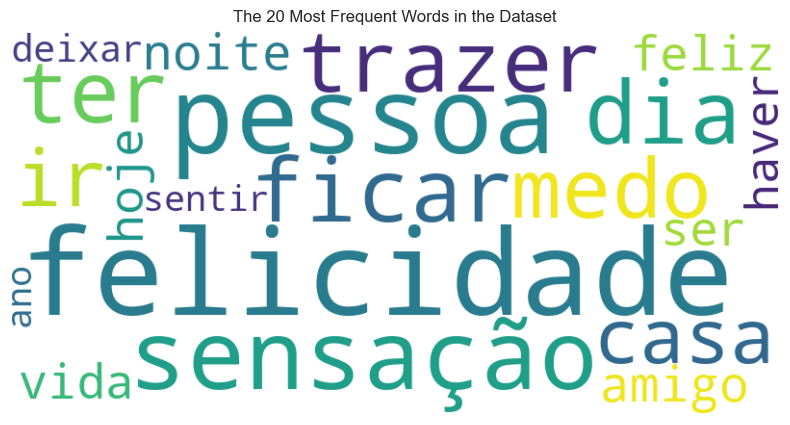

In [193]:
word_frequencies = Counter(words)
top_10_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_10_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [194]:
chunk_size = 1000000
entity_counts = Counter()
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    for ent in doc.ents:
        entity_counts[ent.label_] += 1
total_entities = sum(entity_counts.values())
entity_percentages = {ent: (count / total_entities) * 100 for ent, count in entity_counts.items()}

In [195]:
dfentitycounts = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Valores Absolutos'])
total = dfentitycounts['Valores Absolutos'].sum()
dfentitycounts['Valores Relativos (%)'] = (dfentitycounts['Valores Absolutos'] / total) * 100
dfentitycounts.round(2)

,Valores Absolutos,Valores Relativos (%)
ORG,541,11.25
LOC,1188,24.70
MISC,1576,32.77
PER,1504,31.27


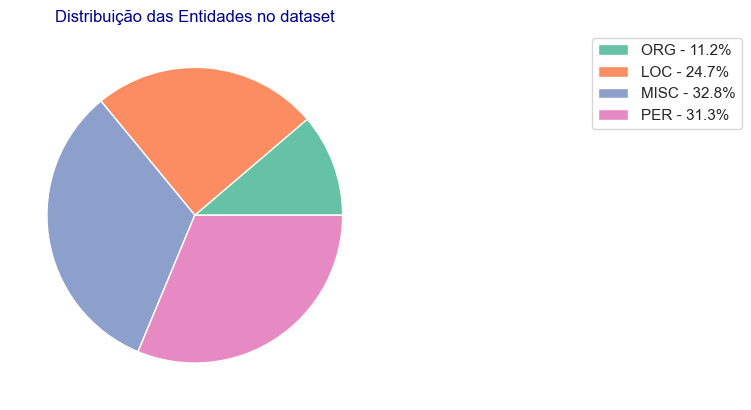

In [196]:
grafico(2)
plt.pie(dfentitycounts['Valores Relativos (%)'])
plt.title('Distribuição das Entidades no dataset', color='Darkblue')
labels = [f"{entidade} - {percent:.1f}%" for entidade, percent in zip(dfentitycounts.index, dfentitycounts['Valores Relativos (%)'])]
plt.legend(labels, loc='upper right', bbox_to_anchor=(2, 1))


In [197]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.10578437912345369, subjectivity=0.6961811962288147)

In [198]:
print("O nosso dataset é composto por ",data.shape[0]," linhas e",data.shape[1]," colunas")

O nosso dataset é composto por  8988  linhas e 3  colunas


In [199]:
data.isnull().sum()

Text          0
Emotion       0
Unnamed: 2    0
dtype: int64

In [200]:
emocoeslist = {"Sadness":0, "Happiness":1, "Disgust":2, "Anger":3, "Fear":4, "Surprise":5, "Neutral":6}
data['Emotion_num'] = data['Emotion'].map(emocoeslist)
data

C:\Users\garci\AppData\Local\Temp\ipykernel_30452\4026689979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Emotion_num'] = data['Emotion'].map(emocoeslist)


,Text,Emotion,Unnamed: 2,Emotion_num
5,- ótimo momento para pensar em como tornar no...,Fear,pt,4
233,- Essas malditas vadias no vídeo do Tyga só m...,Disgust,pt,2
292,- o queeeee!!! Você é louco! RT @SoloDolo254:...,Disgust,pt,2
308,RT @_DynastyP: #CoisasQuePessoasSedentasFazem...,Disgust,pt,2
309,! RT @TheLovelyShanel: EU ODEIO BANHEIROS PÚB...,Disgust,pt,2
...,...,...,...,...
20078,"Assim todos os M&M's foram comidos, a casa est...",Surprise,pt,5
20079,"Zoo foi quinta-feira, ainda tenho de embrulhar...",Surprise,pt,5
20080,O filho fez um super deu. Só existe o Twitter....,Surprise,pt,5
20081,Assim os presentes de Sinterklaas foram compra...,Surprise,pt,5


In [20]:
nlp = spacy.load("pt_core_news_lg")
stop_words = set(stopwords.words('portuguese'))
sia = SentimentIntensityAnalyzer()
def enrich_text_pipeline(text):
    if not isinstance(text, str):
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}
    try:
        text = nfx.remove_userhandles(text.lower().strip())
        text = nfx.remove_urls(text)
        text = nfx.remove_stopwords(text)
        text = nfx.remove_puncts(text)
        
        doc = nlp(text)
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.is_alpha and token.lemma_.lower() not in stop_words
        ]
        cleaned_text = ' '.join(tokens)
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]
        pos_tags = [(token.text, token.pos_) for token in doc]
        sentiment = sia.polarity_scores(cleaned_text)['compound']

        return {
            "text": cleaned_text,
            "ner": named_entities,
            "pos": pos_tags,
            "sentiment": sentiment
        }

    except Exception as e:
        print(f"[Erro] {e}")
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}

In [19]:
def anonymize_selected_entities(text):
    doc = nlp(text)
    new_tokens = []
    entidades_a_remover = {"CARDINAL", "ORG", "PERSON", "DATE"}
    last_idx = 0
    for ent in doc.ents:
        if ent.label_ in entidades_a_remover:
            new_tokens.append(text[last_idx:ent.start_char])
            last_idx = ent.end_char  
    new_tokens.append(text[last_idx:]) 
    return ''.join(new_tokens)

In [18]:
valid_words = set(nltk_words.words())
def reduce_excessive_repeats_smart(text):
    def reduce_word(word):
        if word.lower() in valid_words:
            return word
        return re.sub(r'(.)\1{2,}', r'\1\1', word)
    return ' '.join(reduce_word(w) for w in text.split())

In [17]:
def remove_repeated_words(text):
    return re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', text, flags=re.IGNORECASE)

In [16]:
def clean_text_spacy(text, additional_stopwords=set()):
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop       
        and not token.is_punct            
        and not token.like_num               
        and token.text.lower() not in additional_stopwords
    ]
    return ' '.join(tokens)

In [15]:
def split_hashtag(hashtag):
    hashtag_body = hashtag[1:]
    if any(c.isupper() for c in hashtag_body):
        split_text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', hashtag_body)
        return split_text.lower()
    else:
        split_words = wordninja.split(hashtag_body)
        return " ".join(split_words)
def process_text(text):
    processed_words = []
    for word in text.split():
        if word.startswith('#'):
            processed_words.append(split_hashtag(word))
        else:
            processed_words.append(word)
    return ' '.join(processed_words)

In [14]:
def substituir_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [13]:
def remove_low_tfidf_words(texts, threshold=0.01):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()   
    cleaned_texts = []
    for doc_index, doc in enumerate(texts):
        tfidf_scores = tfidf_matrix[doc_index].toarray().flatten()
        doc_words = doc.split()
        word_tfidf = dict(zip(feature_names, tfidf_scores))
        filtered_words = [word for word in doc_words if word in word_tfidf and word_tfidf[word] >= threshold]       
        cleaned_texts.append(' '.join(filtered_words))
    return cleaned_texts

In [12]:
def corrigir_erros_comuns(text):
    correcoes = {
        "luv": "amor",
        "gr8": "ótimo",
        "ur": "teu",
        "u": "você",
        "r": "és",
        "ya": "você",
        "im": "eu sou",
        "dont": "não",
        "cant": "não posso",
        "wont": "não vou",
        "idk": "eu não sei",
        "omg": "oh meu deus",
        "omfg": "oh meu deus do céu",
        "wtf": "que porra é essa",
        "lmao": "rindo muito",
        "lol": "rindo alto",
        "tho": "embora",
        "thx": "obrigado",
        "pls": "por favor",
        "bf": "namorado",
        "ikr": "eu sei, não é?",
        "plz": "por favor",
        "gonna": "vou",
        "wanna": "quero",
        "gotta": "preciso",
        "ain't": "não é",
        "cuz": "porque",
        "n": "e",
        "them":"deles",
        "bc": "porque",
        "b4": "antes",
        "btw": "a propósito",
        "omw": "estou a caminho",
        "kinda": "tipo",
        "dis": "isto",
        "gf": "namorada",
        "gimme": "dá-me",
        "lemme": "deixa-me",
        "txt": "mensagem",
        "nigga": "negro",
        "wut": "o quê",
        "tn": "esta noite",
        "awk": "estranho",
        "wit": "com",
        "smh": "a abanar a cabeça",
        "tbh": "para ser honesto",
        "nah": "não",
        "yeah": "sim",
        "fb": "Facebook",
        "eva": "alguma vez",
        "OML": "oh meu senhor",
        "nite": "noite",
        "ew": "que nojo",
        "fml": "que merda de vida",
        "bout": "sobre",
        "imma": "vou",
        "fuk": "foda",
        "fukin": "fodido",
        "smdh": "a abanar muito a cabeça",
        "iv": "tenho",
        "fuking": "fodido",
        "lvl": "nível",
        "smmfh": "a abanar muito a cabeça",
        "rip": "descansa em paz",
        "smfh": "a abanar a cabeça com raiva",
        "lvs": "níveis",
        "fuckin": "fodido",
        "dat": "aquilo",
        "ppl": "pessoas",
        "ya'll": "vocês todos",
        "da": "o",
        "yall": "vocês todos",
        "coz": "porque",
        "brb": "já volto",
        "jk": "a brincar",
        "gtg": "tenho de ir",
        "otha": "outro",
        "gtf": "sai da minha frente",
        "talkin": "falando",
        "lil": "pequeno",
        "&": "e",
        "ma": "meu",
        "afk": "longe do teclado",
        "str8": "direto",
        "tyvm": "muito obrigado",
        "tldr": "resumo",
        "tonite": "esta noite",
        "kno": "saber",
        "bou": "sobre",
        "xmas": "Natal",
        "hw": "trabalho de casa",
        "tv": "televisão",
        "Brb": "já volto",
        "sat": "sábado",
        "wat": "o quê",
        "dm": "mensagem privada"
    }
    for errado, certo in correcoes.items():
        text = re.sub(rf'\b{re.escape(errado)}\b', certo, text)
        return text

In [210]:
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(anonymize_selected_entities)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_symspell)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].astype(str).str.lower()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'&quot;.*?&quot;', '', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(process_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\bÃ[\wÂ¢â€™“”]+\b', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã¢Â¬Ã¢Â¬', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\s+', ' ', regex=True).str.strip()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'mÃ¬ Ã¬Â²Ã¬Â¶Ã®ÂµÃ¬Â²Ã¬Â£', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã©', 'é', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã®', 'î', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\b&amp\b', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\S+@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'http\S+|https\S+|www\S+', ' ', regex=True)

In [211]:
nlp = spacy.load("pt_core_news_lg")
stop_words = set(stopwords.words('portuguese'))
tqdm.pandas()
data['Text'] = data['Text'].astype(str).str.lower()
data['Text'] = data['Text'].apply(corrigir_erros_comuns)
data['enriched'] = data['Text'].progress_apply(enrich_text_pipeline)
data['cleaned_text'] = data['enriched'].apply(lambda x: x['text'])
data['sentiment'] = data['enriched'].apply(lambda x: x['sentiment'])
data['entities'] = data['enriched'].apply(lambda x: x['ner'])
data['pos_tags'] = data['enriched'].apply(lambda x: x['pos'])
data['cleaned_text'] = data['cleaned_text'].apply(substituir_emojis)
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: contractions.fix(x))
data['cleaned_text'] = data['cleaned_text'].str.replace(r'\d+',  ' ', regex=True)
data['cleaned_text'] = data['cleaned_text'].apply(reduce_excessive_repeats_smart)
data['cleaned_text'] = data['cleaned_text'].apply(remove_repeated_words)
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: re.sub(r'\b[Tt]hem\b', 'deles', x))
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: clean_text_spacy(x, additional_stopwords={'rt','amp', 'rhoa', 'lol', 'omfg'}))
data['cleaned_text'] = remove_low_tfidf_words(data['cleaned_text'], threshold=0.01)
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))
data['tokens'] = data['cleaned_text'].apply(word_tokenize)
data

C:\Users\garci\AppData\Local\Temp\ipykernel_30452\2765584152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].astype(str).str.lower()
C:\Users\garci\AppData\Local\Temp\ipykernel_30452\2765584152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text'] = data['Text'].apply(corrigir_erros_comuns)
100%|██████████| 8988/8988 [01:08<00:00, 130.81it/s]
C:\Users\garci\AppData\Local\Temp\ipykernel_30452\2765584152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

,Text,Emotion,Unnamed: 2,Emotion_num,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
5,- ótimo momento para pensar em como tornar no...,Fear,pt,4,{'text': 'bom momento pensar tornar mundo mund...,pensar tornar mundo livre,0.0000,[],"[( , SPACE), (ótimo, ADJ), (momento, NOUN), (p...","[pensar, tornar, mundo, livre]"
233,- essas malditas vadias no vídeo do tyga só m...,Disgust,pt,2,{'text': 'maldito vadia vídeo tyga irritar esp...,malditar vadia vídeo tyga irritar esperar víde...,0.0000,"[(tyga, MISC)]","[( , SPACE), (essas, DET), (malditas, ADJ), (v...","[malditar, vadia, vídeo, tyga, irritar, espera..."
292,- o queeeee!!! você é louco! rt @solodolo254:...,Disgust,pt,2,"{'text': 'queeeee louco rt slider castelo', 'n...",quee louco slider castelo,0.0000,"[(queeeee, PER)]","[( , SPACE), (queeeee, ADJ), (você, PRON), (é,...","[quee, louco, slider, castelo]"
308,rt @_dynastyp: #coisasquepessoassedentasfazem...,Disgust,pt,2,{'text': 'rt coisasquepessoassedentasfazem bei...,beijar pessoa de eles boca,0.0000,"[(coisasquepessoassedentasfazem, LOC)]","[(rt, PROPN), (#, PROPN), (coisasquepessoassed...","[beijar, pessoa, de, eles, boca]"
309,! rt @thelovelyshanel: eu odeio banheiros púb...,Disgust,pt,2,{'text': 'rt odeio banheiro público escolar ca...,odeio banheiro público escolar cagar,0.0000,[],"[( , SPACE), (rt, PROPN), (eu, PRON), (odeio, ...","[odeio, banheiro, público, escolar, cagar]"
...,...,...,...,...,...,...,...,...,...,...
20078,"assim todos os m&m's foram comidos, a casa est...",Surprise,pt,5,{'text': 'assim todo mms comir casa novamente ...,mms comir casa novamente decorar arrumar tomar...,0.0000,[],"[(assim, ADV), (todos, DET), (os, DET), (mms, ...","[mms, comir, casa, novamente, decorar, arrumar..."
20079,"zoo foi quinta-feira, ainda tenho de embrulhar...",Surprise,pt,5,{'text': 'zoo quintafeira ainda ter embrulhar ...,zoo quintafeira embrulhar presente imprimir poema,0.0000,"[(zoo, LOC), (quintafeira, LOC)]","[(zoo, NOUN), (foi, AUX), (quintafeira, NOUN),...","[zoo, quintafeira, embrulhar, presente, imprim..."
20080,o filho fez um super deu. só existe o twitter....,Surprise,pt,5,{'text': 'filho fazer super dar existir twitte...,filho super existir twitter motivo caso contrá...,0.5994,[],"[(filho, NOUN), (fez, VERB), (um, DET), (super...","[filho, super, existir, twitter, motivo, caso,..."
20081,assim os presentes de sinterklaas foram compra...,Surprise,pt,5,{'text': 'assim presente sinterklaas comprar a...,presente sinterklaas comprar poema escrever si...,0.0000,"[(sinterklaas, ORG), (sinterklaas, ORG)]","[(assim, ADV), (os, DET), (presentes, NOUN), (...","[presente, sinterklaas, comprar, poema, escrev..."


In [212]:
emocoeslist = {"Sadness":0, "Happiness":1, "Disgust":2, "Anger":3, "Fear":4, "Surprise":5, "Neutral":6}
data = data.drop(columns=['Unnamed: 2'])
data['Emotion_num'] = data['Emotion'].map(emocoeslist)
data = data[data['Text'].str.strip() != ""]
data = data[data['cleaned_text'].str.strip() != ""]
data = data[data['Text'].str.split().apply(len) > 1]
data = data[data['cleaned_text'].str.split().apply(len) > 1]
data = data.drop_duplicates(subset='Text').reset_index(drop=True)
data = data.drop_duplicates(subset='cleaned_text').reset_index(drop=True)
data

,Text,Emotion,Emotion_num,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
0,- ótimo momento para pensar em como tornar no...,Fear,4,{'text': 'bom momento pensar tornar mundo mund...,pensar tornar mundo livre,0.0000,[],"[( , SPACE), (ótimo, ADJ), (momento, NOUN), (p...","[pensar, tornar, mundo, livre]"
1,- essas malditas vadias no vídeo do tyga só m...,Disgust,2,{'text': 'maldito vadia vídeo tyga irritar esp...,malditar vadia vídeo tyga irritar esperar víde...,0.0000,"[(tyga, MISC)]","[( , SPACE), (essas, DET), (malditas, ADJ), (v...","[malditar, vadia, vídeo, tyga, irritar, espera..."
2,- o queeeee!!! você é louco! rt @solodolo254:...,Disgust,2,"{'text': 'queeeee louco rt slider castelo', 'n...",quee louco slider castelo,0.0000,"[(queeeee, PER)]","[( , SPACE), (queeeee, ADJ), (você, PRON), (é,...","[quee, louco, slider, castelo]"
3,rt @_dynastyp: #coisasquepessoassedentasfazem...,Disgust,2,{'text': 'rt coisasquepessoassedentasfazem bei...,beijar pessoa de eles boca,0.0000,"[(coisasquepessoassedentasfazem, LOC)]","[(rt, PROPN), (#, PROPN), (coisasquepessoassed...","[beijar, pessoa, de, eles, boca]"
4,! rt @thelovelyshanel: eu odeio banheiros púb...,Disgust,2,{'text': 'rt odeio banheiro público escolar ca...,odeio banheiro público escolar cagar,0.0000,[],"[( , SPACE), (rt, PROPN), (eu, PRON), (odeio, ...","[odeio, banheiro, público, escolar, cagar]"
...,...,...,...,...,...,...,...,...,...
7964,"assim todos os m&m's foram comidos, a casa est...",Surprise,5,{'text': 'assim todo mms comir casa novamente ...,mms comir casa novamente decorar arrumar tomar...,0.0000,[],"[(assim, ADV), (todos, DET), (os, DET), (mms, ...","[mms, comir, casa, novamente, decorar, arrumar..."
7965,"zoo foi quinta-feira, ainda tenho de embrulhar...",Surprise,5,{'text': 'zoo quintafeira ainda ter embrulhar ...,zoo quintafeira embrulhar presente imprimir poema,0.0000,"[(zoo, LOC), (quintafeira, LOC)]","[(zoo, NOUN), (foi, AUX), (quintafeira, NOUN),...","[zoo, quintafeira, embrulhar, presente, imprim..."
7966,o filho fez um super deu. só existe o twitter....,Surprise,5,{'text': 'filho fazer super dar existir twitte...,filho super existir twitter motivo caso contrá...,0.5994,[],"[(filho, NOUN), (fez, VERB), (um, DET), (super...","[filho, super, existir, twitter, motivo, caso,..."
7967,assim os presentes de sinterklaas foram compra...,Surprise,5,{'text': 'assim presente sinterklaas comprar a...,presente sinterklaas comprar poema escrever si...,0.0000,"[(sinterklaas, ORG), (sinterklaas, ORG)]","[(assim, ADV), (os, DET), (presentes, NOUN), (...","[presente, sinterklaas, comprar, poema, escrev..."


C:\Users\garci\AppData\Local\Temp\ipykernel_30452\1215207054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")


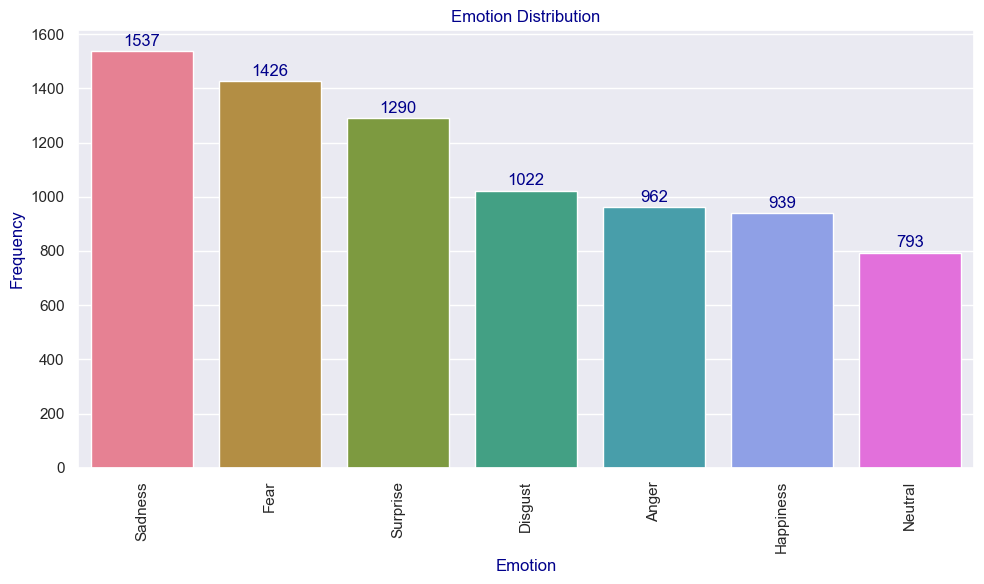

In [213]:
grafico(4)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")
plt.xlabel('Emotion', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequency', color='Darkblue')
plt.title('Emotion Distribution', color='Darkblue')
for i, value in enumerate(data['Emotion'].value_counts()):
    plt.text(i, value+20, str(value),ha='center',color='Darkblue')
plt.tight_layout()
plt.show() 

In [214]:
textounico = ' '.join(data['cleaned_text'])
len(textounico)

440728

In [215]:
nlp = spacy.load("pt_core_news_lg", disable=["ner","parser"])
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words2 = []
for chunk in chunks:
    doc = nlp(chunk)
    words2.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.ent_type_ == ""])
print(f"Total de palavras processadas: {len(words2)}")

Total de palavras processadas: 56284


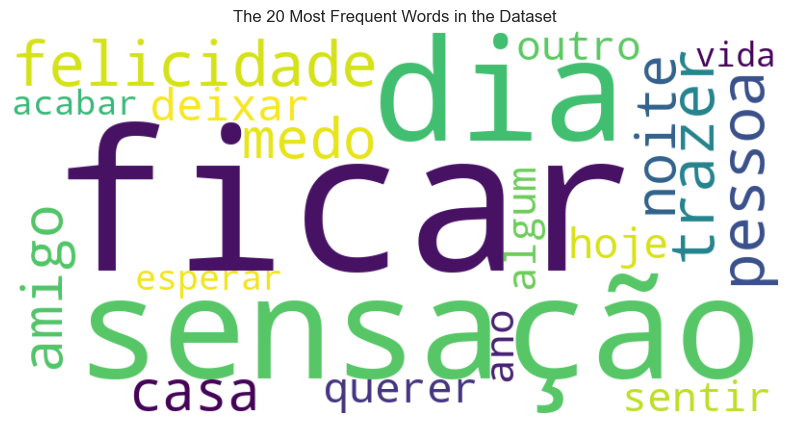

In [216]:
word_frequencies = Counter(words2)
top_20_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_20_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [217]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.10670359749739323, subjectivity=0.4937887021737393)

In [218]:
data.to_csv("Dataset\\datasetlimpo_PT.csv", index=False)

In [6]:
data = pd.read_csv("Dataset\\datasetlimpo_PT.csv")
data

,Text,Emotion,Emotion_num,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
0,- ótimo momento para pensar em como tornar no...,Fear,4,{'text': 'bom momento pensar tornar mundo mund...,pensar tornar mundo livre,0.0000,[],"[(' ', 'SPACE'), ('ótimo', 'ADJ'), ('momento',...","['pensar', 'tornar', 'mundo', 'livre']"
1,- essas malditas vadias no vídeo do tyga só m...,Disgust,2,{'text': 'maldito vadia vídeo tyga irritar esp...,malditar vadia vídeo tyga irritar esperar víde...,0.0000,"[('tyga', 'MISC')]","[(' ', 'SPACE'), ('essas', 'DET'), ('malditas'...","['malditar', 'vadia', 'vídeo', 'tyga', 'irrita..."
2,- o queeeee!!! você é louco! rt @solodolo254:...,Disgust,2,"{'text': 'queeeee louco rt slider castelo', 'n...",quee louco slider castelo,0.0000,"[('queeeee', 'PER')]","[(' ', 'SPACE'), ('queeeee', 'ADJ'), ('você', ...","['quee', 'louco', 'slider', 'castelo']"
3,rt @_dynastyp: #coisasquepessoassedentasfazem...,Disgust,2,{'text': 'rt coisasquepessoassedentasfazem bei...,beijar pessoa de eles boca,0.0000,"[('coisasquepessoassedentasfazem', 'LOC')]","[('rt', 'PROPN'), ('#', 'PROPN'), ('coisasquep...","['beijar', 'pessoa', 'de', 'eles', 'boca']"
4,! rt @thelovelyshanel: eu odeio banheiros púb...,Disgust,2,{'text': 'rt odeio banheiro público escolar ca...,odeio banheiro público escolar cagar,0.0000,[],"[(' ', 'SPACE'), ('rt', 'PROPN'), ('eu', 'PRON...","['odeio', 'banheiro', 'público', 'escolar', 'c..."
...,...,...,...,...,...,...,...,...,...
7964,"assim todos os m&m's foram comidos, a casa est...",Surprise,5,{'text': 'assim todo mms comir casa novamente ...,mms comir casa novamente decorar arrumar tomar...,0.0000,[],"[('assim', 'ADV'), ('todos', 'DET'), ('os', 'D...","['mms', 'comir', 'casa', 'novamente', 'decorar..."
7965,"zoo foi quinta-feira, ainda tenho de embrulhar...",Surprise,5,{'text': 'zoo quintafeira ainda ter embrulhar ...,zoo quintafeira embrulhar presente imprimir poema,0.0000,"[('zoo', 'LOC'), ('quintafeira', 'LOC')]","[('zoo', 'NOUN'), ('foi', 'AUX'), ('quintafeir...","['zoo', 'quintafeira', 'embrulhar', 'presente'..."
7966,o filho fez um super deu. só existe o twitter....,Surprise,5,{'text': 'filho fazer super dar existir twitte...,filho super existir twitter motivo caso contrá...,0.5994,[],"[('filho', 'NOUN'), ('fez', 'VERB'), ('um', 'D...","['filho', 'super', 'existir', 'twitter', 'moti..."
7967,assim os presentes de sinterklaas foram compra...,Surprise,5,{'text': 'assim presente sinterklaas comprar a...,presente sinterklaas comprar poema escrever si...,0.0000,"[('sinterklaas', 'ORG'), ('sinterklaas', 'ORG')]","[('assim', 'ADV'), ('os', 'DET'), ('presentes'...","['presente', 'sinterklaas', 'comprar', 'poema'..."


In [7]:
X,y = data['cleaned_text'], data['Emotion_num']
X = X.reset_index(drop=True)  
y = y.reset_index(drop=True)
print(X[0])
print(y[0])

pensar tornar mundo livre
4


In [221]:
with open('Recursos\\X_PT.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('Recursos\\y_PT.pickle','wb') as f:
    pickle.dump(y,f)

# Models

<center>

### Regressão Logistica

</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] **[Regressão logística](#secao994)**
      - [ ] [Naive Bayes](#secao993)
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [4]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [7]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', LogisticRegression(random_state=42,max_iter=1000))])
#param_grid = {'vectorizer__max_features': [9000, 10000, 11000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2 ,0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 5), (1, 6), (1, 7)]}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 10000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 5)}
Melhor F1-Score: 0.5863458998074871


In [8]:
#vectorizer = TfidfVectorizer(max_features = 10000, min_df = 1, max_df = 0.1,ngram_range=(1,5))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRLPT_tese.joblib')

['Parte1/EmotionFromText/vectorizerRLPT_tese.joblib']

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [46]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}

all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None

start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    try:
        model = LogisticRegression(random_state=42, **params)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_params = params

    except Exception as e:
        print(f"Erro com params {params}: {e}")

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress: 100%|██████████| 12/12 [47:40<00:00, 238.40s/it]

Melhores Parâmetros: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Melhor F1 ponderado: 0.6107402408799959


In [10]:
classifier = LogisticRegression(C=1,
                                solver='saga',
                                max_iter=500,
                                class_weight='balanced',
                                random_state = 42,
                                penalty='l2')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_val)

In [11]:
joblib.dump(classifier, 'Parte1/EmotionFromText/logistic_regression_model_PT_tese.joblib')

['Parte1/EmotionFromText/logistic_regression_model_PT_tese.joblib']

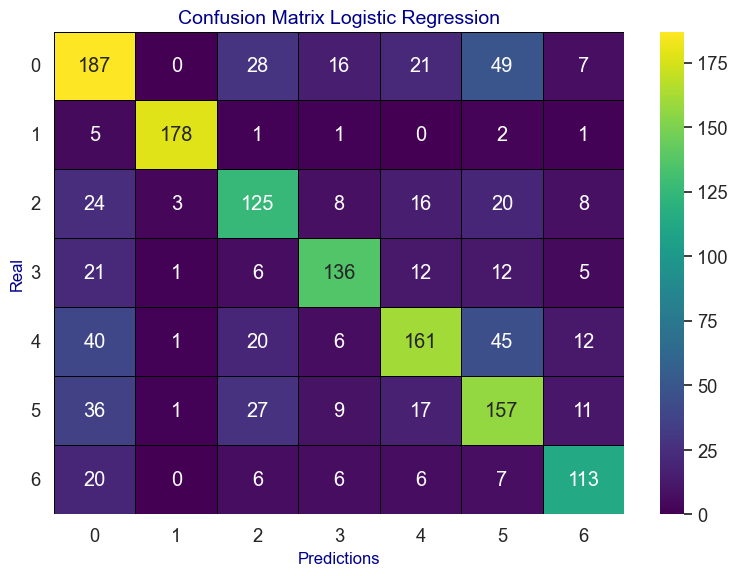

In [12]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=classifier.classes_ , yticklabels=classifier.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), y_pred.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       308
           1       0.97      0.95      0.96       188
           2       0.59      0.61      0.60       204
           3       0.75      0.70      0.73       193
           4       0.69      0.56      0.62       285
           5       0.54      0.61      0.57       258
           6       0.72      0.72      0.72       158

    accuracy                           0.66      1594
   macro avg       0.69      0.68      0.68      1594
weighted avg       0.67      0.66      0.66      1594



In [14]:
resultados = avaliar_modelo(y_test, y_pred, y_val, y_pred2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6631,0.6648,0.6631,0.6701
Validação,0.6481,0.6482,0.6481,0.6490


<center>

### Naive Bayes
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] **[Naive Bayes](#secao993)**
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [15]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [16]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])
#param_grid = {'vectorizer__max_features': [3000, 4000, 5000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2 ,0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(data['Text'], data['Emotion_num'])
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 3000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5453174012889217


In [18]:
#vectorizer = TfidfVectorizer(max_features = 3000, min_df = 1, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerNB_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizerNB_PT_tese.joblib']

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [239]:
param_grid = {'alpha': [0.2, 0.3, 0.4]}
grid_search = GridSearchCV(estimator=MultinomialNB(),param_grid=param_grid,scoring='f1_weighted',cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

Melhores Parâmetros: {'alpha': 0.3}
Melhor Acurácia: 0.6024939916936203


In [20]:
naive=MultinomialNB(alpha= 0.3)
naive.fit(X_train, y_train)
previsoesnb = naive.predict(X_test)
previsoesnb2 = naive.predict(X_val)

In [21]:
joblib.dump(naive, 'Parte1/EmotionFromText/TeseNB_PT_model.joblib')

['Parte1/EmotionFromText/TeseNB_PT_model.joblib']

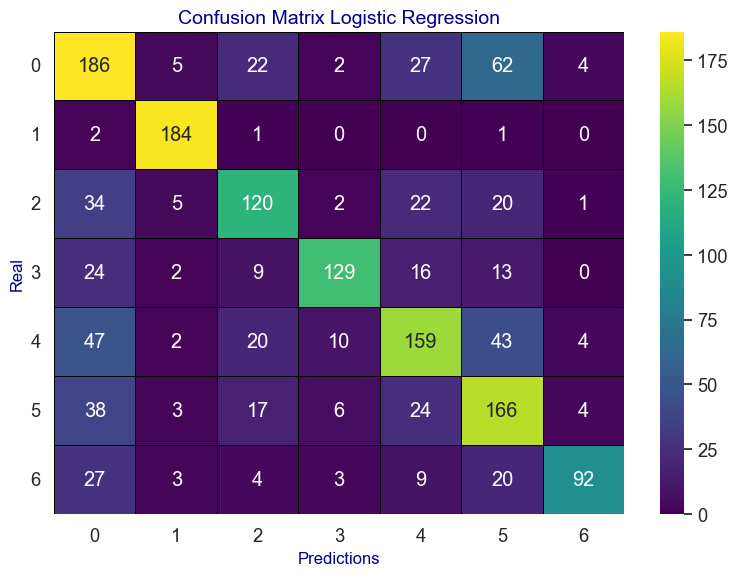

In [22]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesnb), annot=True, fmt='d', cmap='viridis', xticklabels=naive.classes_ , yticklabels=naive.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesnb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       308
           1       0.90      0.98      0.94       188
           2       0.62      0.59      0.60       204
           3       0.85      0.67      0.75       193
           4       0.62      0.56      0.59       285
           5       0.51      0.64      0.57       258
           6       0.88      0.58      0.70       158

    accuracy                           0.65      1594
   macro avg       0.70      0.66      0.67      1594
weighted avg       0.67      0.65      0.65      1594



In [24]:
resultados = avaliar_modelo(y_test, previsoesnb, y_val, previsoesnb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6499,0.6530,0.6499,0.6692
Validação,0.6418,0.6468,0.6418,0.6646


<center>

### XBoost
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [X] **[XGBoost](#secao997)**
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fastetext)](#secao993)

In [25]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', XGBClassifier())])
#param_grid = {'vectorizer__max_features': [2000, 3000, 4000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2 ,0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 3000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5447018640763927


In [27]:
#vectorizer = TfidfVectorizer(max_features = 3000, min_df = 1, max_df = 0.1,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerXGB_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizerXGB_PT_tese.joblib']

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [73]:
param_grid = {'n_estimators': [200, 300, 400],
              'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [10, 15, 20],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.4, 0.5, 0.6]}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = XGBClassifier(random_state=42, **params, n_jobs=-1)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress:   7%|▋         | 12/162 [20:47<4:19:54, 103.96s/it]


GridSearch Progress: 100%|██████████| 162/162 [3:33:39<00:00, 79.13s/it]   

Melhores Parâmetros: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Melhor F1 ponderado: 0.557480441089218


In [29]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
xgb = XGBClassifier(colsample_bytree=0.5, learning_rate= 0.2, max_depth=10, n_estimators=200, subsample=1.0)
xgb.fit(X_train, y_train, sample_weight=sample_weights)
previsoesxgb = xgb.predict(X_test)
previsoesxgb2 = xgb.predict(X_val)

In [30]:
joblib.dump(xgb, 'Parte1/EmotionFromText/xgb_model_PT_tese.joblib')

['Parte1/EmotionFromText/xgb_model_PT_tese.joblib']

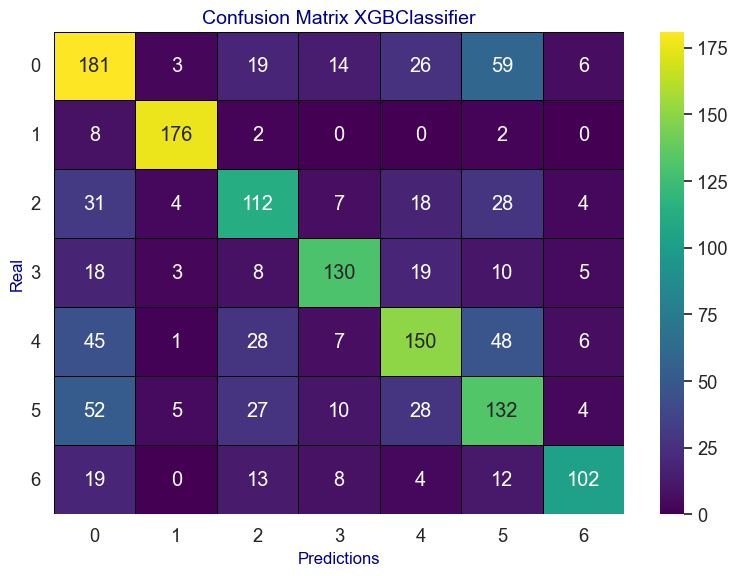

In [31]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesxgb), annot=True, fmt='d', cmap='viridis', xticklabels=xgb.classes_ , yticklabels=xgb.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix XGBClassifier', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesxgb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55       308
           1       0.92      0.94      0.93       188
           2       0.54      0.55      0.54       204
           3       0.74      0.67      0.70       193
           4       0.61      0.53      0.57       285
           5       0.45      0.51      0.48       258
           6       0.80      0.65      0.72       158

    accuracy                           0.62      1594
   macro avg       0.65      0.63      0.64      1594
weighted avg       0.63      0.62      0.62      1594



In [33]:
resultados = avaliar_modelo(y_test, previsoesxgb, y_val, previsoesxgb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6167,0.6196,0.6167,0.6274
Validação,0.6085,0.6128,0.6085,0.6190



<center>

### Decision Tree
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] **[Decision Tree](#secao999)**
      - [ ] [Random Forest](#secao998)
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [34]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', DecisionTreeClassifier())])
#param_grid = {
#    'vectorizer__max_features': [7000, 8000, 9000],
#    'vectorizer__min_df': [3, 4, 5],
#    'vectorizer__max_df': [0.3, 0.4, 0.5, 0.6],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.6, 'vectorizer__max_features': 7000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.48463622724021593


In [35]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [36]:
#vectorizer = TfidfVectorizer(max_features = 7000,min_df = 3,max_df = 0.6,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerDT_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizerDT_PT_tese.joblib']

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [89]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05], 
    'max_leaf_nodes': [None, 50], 
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = DecisionTreeClassifier(random_state=42, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress: 100%|██████████| 512/512 [19:34<00:00,  2.29s/it]  

Melhores Parâmetros: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}
Melhor F1 ponderado: 0.5076453300057675


In [38]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
arvore = DecisionTreeClassifier(max_depth=None,
                                ccp_alpha=0.0, 
                                criterion='gini',
                                class_weight='balanced',
                                max_features=None,
                                max_leaf_nodes=None,
                                min_samples_leaf=1,
                                min_samples_split=10,
                                splitter='random',
                                min_weight_fraction_leaf=0.0)
arvore.fit(X_train,y_train)
previsoesdt = arvore.predict(X_test)
previsoesdt2 = arvore.predict(X_val)

In [39]:
joblib.dump(arvore, 'Parte1/EmotionFromText/DT_PT_tese.joblib')

['Parte1/EmotionFromText/DT_PT_tese.joblib']

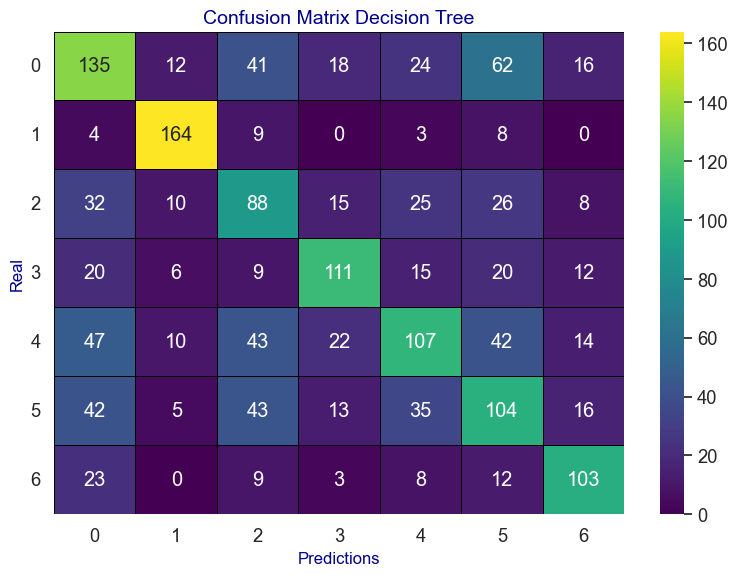

In [40]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesdt), annot=True, fmt='d', cmap='viridis', xticklabels=arvore.classes_ , yticklabels=arvore.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Decision Tree', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [41]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesdt.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44       308
           1       0.79      0.87      0.83       188
           2       0.36      0.43      0.39       204
           3       0.61      0.58      0.59       193
           4       0.49      0.38      0.43       285
           5       0.38      0.40      0.39       258
           6       0.61      0.65      0.63       158

    accuracy                           0.51      1594
   macro avg       0.53      0.54      0.53      1594
weighted avg       0.51      0.51      0.51      1594



In [42]:
resultados = avaliar_modelo(y_test, previsoesdt, y_val, previsoesdt2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5094,0.5075,0.5094,0.5099
Validação,0.4774,0.4756,0.4774,0.4755


<center>

### Random Forest
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] **[Random Forest](#secao998)**
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)

In [43]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', RandomForestClassifier())])
#param_grid = {
#    'vectorizer__max_features': [5000, 6000, 7000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.5, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.5, 'vectorizer__max_features': 6000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5561439946436851


In [44]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [45]:
#vectorizer = TfidfVectorizer(max_features = 6000, min_df = 2, max_df = 0.5,ngram_range= (1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRF_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizerRF_PT_tese.joblib']

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [97]:
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05],
    'max_leaf_nodes': [None, 50],
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress: 100%|██████████| 512/512 [14:24:40<00:00, 101.33s/it]   

Melhores Parâmetros: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Melhor F1 ponderado: 0.5773607185019115


In [47]:
randomforest = RandomForestClassifier(class_weight='balanced',
                                      ccp_alpha=0.0,
                                      criterion='gini',
                                      n_estimators=200,
                                      max_leaf_nodes=None,
                                      min_samples_leaf=1, 
                                      max_depth=None,
                                      min_weight_fraction_leaf=0.0,
                                      min_samples_split=10,
                                      max_features='sqrt',
                                      random_state=42)
randomforest.fit(X_train, y_train)
previsoesrf = randomforest.predict(X_test)
previsoesrf2 = randomforest.predict(X_val)

In [48]:
joblib.dump(randomforest, 'Parte1/EmotionFromText/RT_PT_Tese.joblib')

['Parte1/EmotionFromText/RT_PT_Tese.joblib']

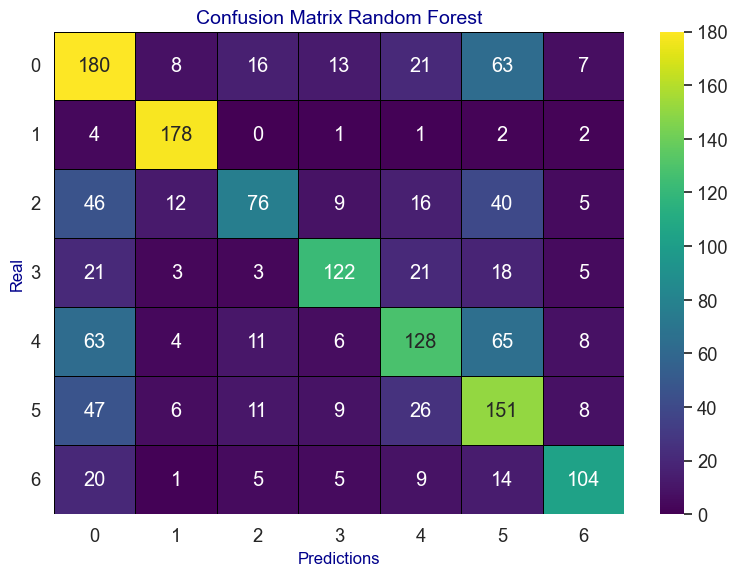

In [49]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesrf), annot=True, fmt='d', cmap='viridis', xticklabels=randomforest.classes_ , yticklabels=randomforest.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [50]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesrf.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.47      0.58      0.52       308
           1       0.84      0.95      0.89       188
           2       0.62      0.37      0.47       204
           3       0.74      0.63      0.68       193
           4       0.58      0.45      0.50       285
           5       0.43      0.59      0.49       258
           6       0.75      0.66      0.70       158

    accuracy                           0.59      1594
   macro avg       0.63      0.60      0.61      1594
weighted avg       0.61      0.59      0.59      1594



In [51]:
resultados = avaliar_modelo(y_test, previsoesrf, y_val, previsoesrf2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5891,0.5878,0.5891,0.6061
Validação,0.5853,0.5871,0.5853,0.6035


<center>

### K-Nearest Neighbors
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] **[K-Nearest Neighbors](#secao996)**
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino GloVe)](#secao993)

In [52]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier',  KNeighborsClassifier())])
#param_grid = {
#    'vectorizer__max_features': [100, 500, 1000],
#    'vectorizer__min_df': [6, 7, 8],
#    'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.2, 'vectorizer__max_features': 500, 'vectorizer__min_df': 8, 'vectorizer__ngram_range': (1, 2)}
Melhor F1-Score: 0.367623370886949


In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [54]:
#vectorizer = TfidfVectorizer(max_features = 500, min_df = 8, max_df = 0.2,ngram_range=(1, 2))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerKNN_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizerKNN_PT_tese.joblib']

In [55]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [99]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = KNeighborsClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress: 100%|██████████| 576/576 [1:57:04<00:00, 12.20s/it]  

Melhores Parâmetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Melhor F1 ponderado: 0.31575085858072927


In [56]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance', leaf_size= 10, p=1, metric='euclidean')
knn.fit(X_train, y_train)
previsoesknn = knn.predict(X_test)
previsoesknn2 = knn.predict(X_val)

In [57]:
joblib.dump(knn, 'Parte1/EmotionFromText/KNN_PT_tese.joblib')

['Parte1/EmotionFromText/KNN_PT_tese.joblib']

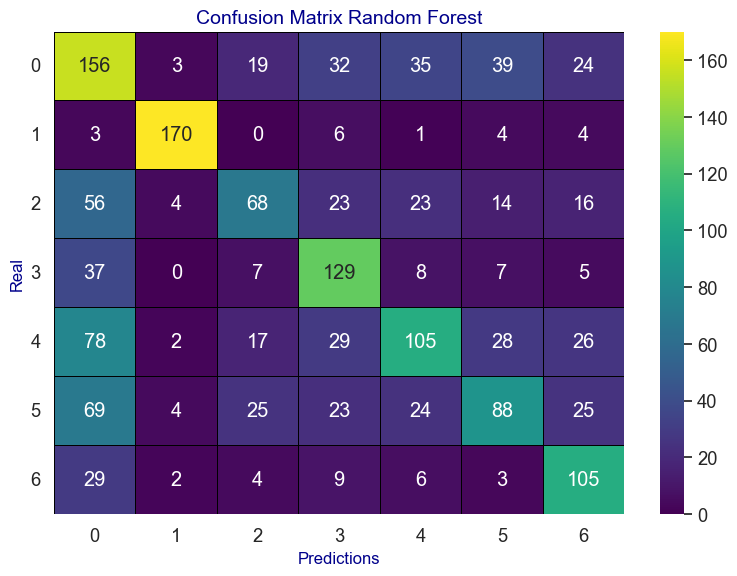

In [58]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesknn), annot=True, fmt='d', cmap='viridis', xticklabels=knn.classes_ , yticklabels=knn.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesknn.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.36      0.51      0.42       308
           1       0.92      0.90      0.91       188
           2       0.49      0.33      0.40       204
           3       0.51      0.67      0.58       193
           4       0.52      0.37      0.43       285
           5       0.48      0.34      0.40       258
           6       0.51      0.66      0.58       158

    accuracy                           0.52      1594
   macro avg       0.54      0.54      0.53      1594
weighted avg       0.52      0.52      0.51      1594



In [60]:
resultados = avaliar_modelo(y_test, previsoesknn, y_val, previsoesknn2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5151,0.5094,0.5151,0.5247
Validação,0.4849,0.4737,0.4849,0.4853


<center>

### SVC
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] **[SVM](#secao995)**
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [61]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X,y = data['cleaned_text'], data['Emotion_num']

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', SVC())])
#param_grid = {'vectorizer__max_features': [5000, 6000, 7000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5767994661557456


In [64]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [65]:
#vectorizer = TfidfVectorizer(max_features = 5000, min_df = 2, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizersvm_PT_tese.joblib')

['Parte1/EmotionFromText/vectorizersvm_PT_tese.joblib']

In [66]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [101]:
param_grid = {
    'C': [1, 10], 
    'kernel': ['linear', 'rbf'], 
    'degree': [3],
    'gamma': ['scale', 0.01], 
    'class_weight': [None], 
    'shrinking': [True] 
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)

best_score = -np.inf
best_params = None

start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    model = SVC(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

GridSearch Progress: 100%|██████████| 8/8 [10:54<00:00, 81.86s/it]

Melhores Parâmetros: {'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
Melhor F1 ponderado: 0.6052077636729483


In [67]:
SVCmodel = SVC(C=1,degree=3, gamma='scale',kernel='linear',shrinking=True, class_weight='balanced',)
SVCmodel.fit(X_train, y_train)
previsoessvc = SVCmodel.predict(X_test)
previsoessvc2 = SVCmodel.predict(X_val)

In [68]:
joblib.dump(SVCmodel, 'Parte1/EmotionFromText/SVC_PT_tese.joblib')

['Parte1/EmotionFromText/SVC_PT_tese.joblib']

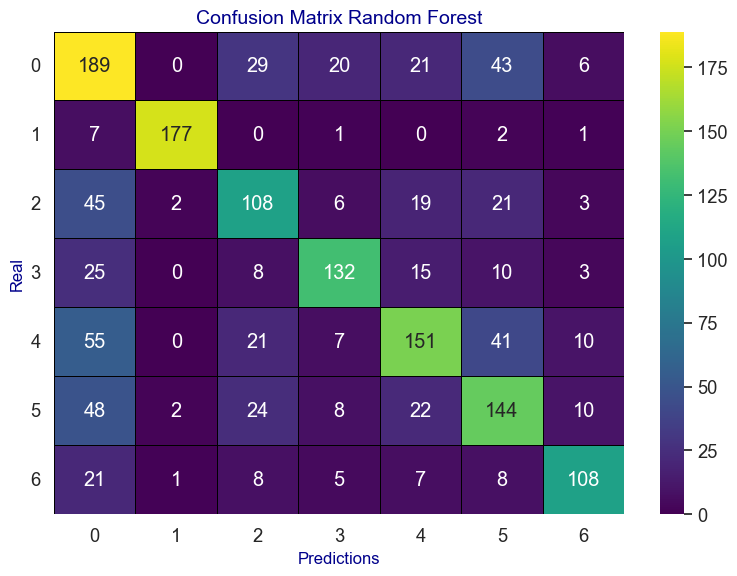

In [69]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoessvc), annot=True, fmt='d', cmap='viridis', xticklabels=SVCmodel.classes_ , yticklabels=SVCmodel.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoessvc.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.48      0.61      0.54       308
           1       0.97      0.94      0.96       188
           2       0.55      0.53      0.54       204
           3       0.74      0.68      0.71       193
           4       0.64      0.53      0.58       285
           5       0.54      0.56      0.55       258
           6       0.77      0.68      0.72       158

    accuracy                           0.63      1594
   macro avg       0.67      0.65      0.66      1594
weighted avg       0.64      0.63      0.64      1594



In [71]:
resultados = avaliar_modelo(y_test, previsoessvc, y_val, previsoessvc2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6330,0.6361,0.6330,0.6449
Validação,0.6255,0.6288,0.6255,0.6359


<center>

### CNN (com pré treino FastText)
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] ~~[SVM](#secao995)~~
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] **[CNN (com pré treino fasttext)](#secao993)**

In [3]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [4]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [5]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [9]:
embedding_index = {}
with open("Recursos\\cc.pt.300.vec", encoding="utf8", newline='\n', errors='ignore') as f:
    next(f)
    for line in f:
        values = line.rstrip().split(" ")
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=300, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_fasttest.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 300
num_words = 20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Fasttext_CNN_PT_embedding_matrix.npy", embedding_matrix)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [11]:
y_train_cat = to_categorical(y_train, num_classes=7)
y_val_cat = to_categorical(y_val, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [12]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001,weight_decay=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,000,000 (22.89 MB)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='Val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_cnn_model_PT.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [14]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_reduce, checkpoint], class_weight=class_weights
)

Epoch 1/100
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1613 - loss: 5.5812

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `Val_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.1614 - loss: 5.5722 - val_accuracy: 0.2127 - val_loss: 3.7086 - learning_rate: 1.0000e-04
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.1816 - loss: 3.9465 - val_accuracy: 0.2189 - val_loss: 3.6590 - learning_rate: 1.0000e-04
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.1936 - loss: 3.6774 - val_accuracy: 0.2189 - val_loss: 3.5917 - learning_rate: 1.0000e-04
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.2001 - loss: 3.5763 - val_accuracy: 0.2233 - val_loss: 3.5150 - learning_rate: 1.0000e-04
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.2318 - loss: 3.4855 - val_accuracy: 0.2440 - val_loss: 3.4417 - learning_rate: 1.0000e-04
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.2361 - loss: 3.4052 - val_accuracy: 0.2560 - val_loss: 3.3538 - learning_rate: 1.0000e-04
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accur

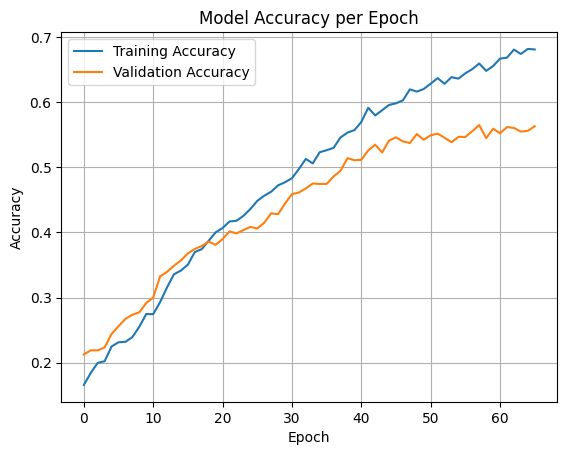

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
model_path = "Parte1/EmotionFromText/sentimentcnnmodel_tese_PT.h5"
model.save(model_path)

You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


In [17]:
previsoesCNN = model.predict(X_test)
previsoesCNNval = model.predict(X_val)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [18]:
previsoesCNN2 = np.argmax(previsoesCNN, axis=1)
previsoesCNNval2 = np.argmax(previsoesCNNval, axis=1)

In [19]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8212 - loss: 0.8521
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5683 - loss: 1.3879
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5532 - loss: 1.4312


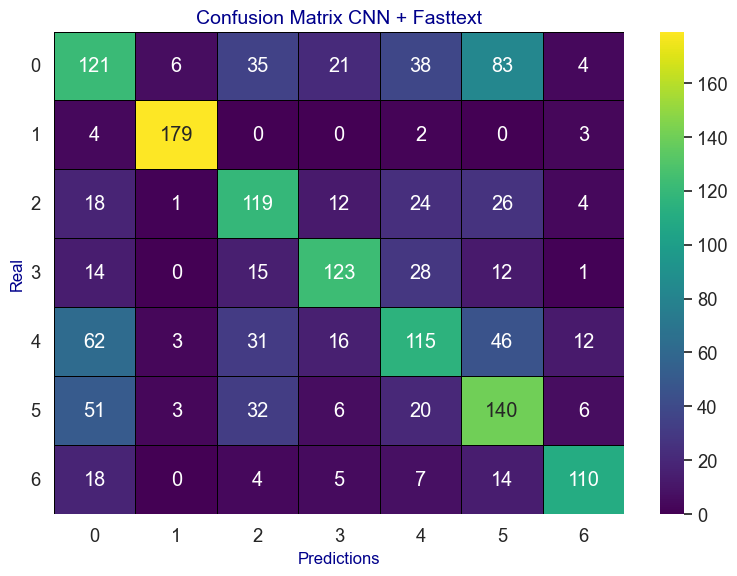

In [20]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesCNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix CNN + Fasttext', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesCNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.42      0.39      0.41       308
           1       0.93      0.95      0.94       188
           2       0.50      0.58      0.54       204
           3       0.67      0.64      0.65       193
           4       0.49      0.40      0.44       285
           5       0.44      0.54      0.48       258
           6       0.79      0.70      0.74       158

    accuracy                           0.57      1594
   macro avg       0.61      0.60      0.60      1594
weighted avg       0.57      0.57      0.57      1594



In [27]:
resultados = avaliar_modelo(y_test, previsoesCNN2, y_val, previsoesCNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5690,0.5687,0.5690,0.5734
Validação,0.5602,0.5602,0.5602,0.5667


### RNN (com pré treino Fasttext)

In [28]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [29]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [30]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [31]:
embedding_index = {}
with open("Recursos\\cc.pt.300.vec", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=300, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_glove.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 300
num_words = 20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Glove_RNN_EN_embedding_matrix.npy", embedding_matrix)

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [33]:
y_train_cat = to_categorical(y_train, num_classes=7)
y_val_cat = to_categorical(y_val, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [34]:
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0005, weight_decay=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,000,000 (22.89 MB)

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_rnn_model.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [36]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_reduce, checkpoint],class_weight=class_weights
)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 120s 733ms/step - accuracy: 0.1736 - loss: 2.4246 - val_accuracy: 0.1073 - val_loss: 1.9084 - learning_rate: 5.0000e-04
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 101s 673ms/step - accuracy: 0.2761 - loss: 1.8110 - val_accuracy: 0.3369 - val_loss: 1.6977 - learning_rate: 5.0000e-04
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 576ms/step - accuracy: 0.3300 - loss: 1.6308 - val_accuracy: 0.3965 - val_loss: 1.4709 - learning_rate: 5.0000e-04
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 104s 691ms/step - accuracy: 0.3638 - loss: 1.5068 - val_accuracy: 0.4172 - val_loss: 1.3834 - learning_rate: 5.0000e-04
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 92s 615ms/step - accuracy: 0.4159 - loss: 1.4189 - val_accuracy: 0.4216 - val_loss: 1.4076 - learning_rate: 5.0000e-04
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 96s 641ms/step - accuracy: 0.3977 - loss: 1.4071 - val_accuracy: 0.4573 - val_loss: 1.3210 - learning_rate: 5.0000e-04
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━

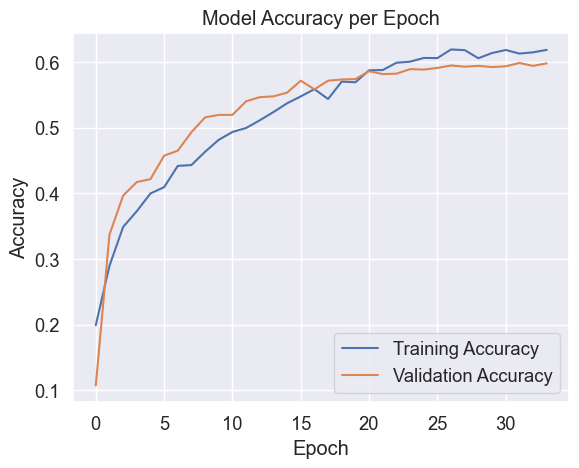

In [37]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
previsoesRNN = model.predict(X_test)
previsoesRNNval = model.predict(X_val)

50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step


In [39]:
previsoesRNN2 = np.argmax(previsoesRNN, axis=1)
previsoesRNNval2 = np.argmax(previsoesRNNval, axis=1)

In [40]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 262ms/step - accuracy: 0.7091 - loss: 0.8010
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.5829 - loss: 1.0395
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 260ms/step - accuracy: 0.5981 - loss: 1.0605


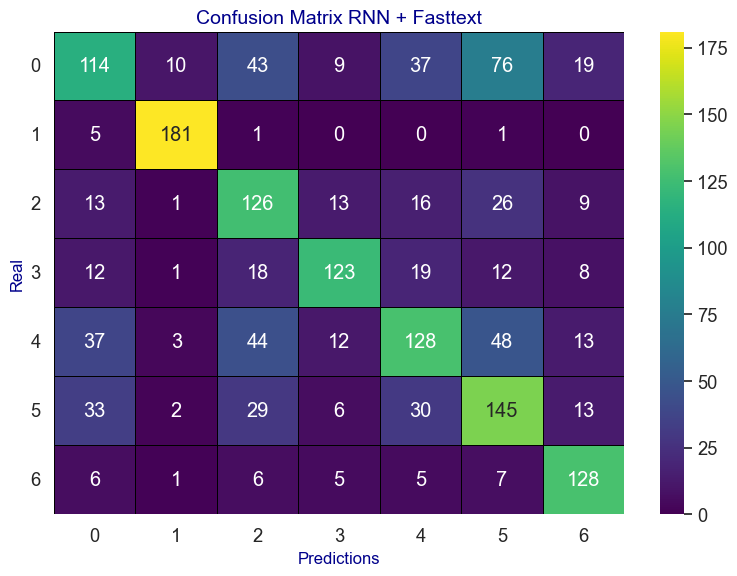

In [41]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesRNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix RNN + Fasttext', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesRNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43       308
           1       0.91      0.96      0.94       188
           2       0.47      0.62      0.54       204
           3       0.73      0.64      0.68       193
           4       0.54      0.45      0.49       285
           5       0.46      0.56      0.51       258
           6       0.67      0.81      0.74       158

    accuracy                           0.59      1594
   macro avg       0.62      0.63      0.62      1594
weighted avg       0.60      0.59      0.59      1594



In [43]:
resultados = avaliar_modelo(y_test, previsoesRNN2, y_val, previsoesRNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5928,0.5876,0.5928,0.5951
Validação,0.5941,0.5872,0.5941,0.5972


## Roberta

In [17]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [18]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [19]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [20]:
tokenizer = RobertaTokenizerFast.from_pretrained('eduagarcia/RoBERTaLexPT-base')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [21]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [22]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

In [23]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [24]:
model = RobertaForSequenceClassification.from_pretrained('eduagarcia/RoBERTaLexPT-base', num_labels=7)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted')
    }
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at eduagarcia/RoBERTaLexPT-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
trainer.train()

  0%|          | 0/11970 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9455915093421936, 'eval_accuracy': 0.6549560853199499, 'eval_f1': 0.656525536725342, 'eval_runtime': 4.5934, 'eval_samples_per_second': 173.511, 'eval_steps_per_second': 10.885, 'epoch': 1.0}
{'loss': 1.1896, 'grad_norm': 15.29651927947998, 'learning_rate': 1.9164578111946533e-05, 'epoch': 1.25}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9481953382492065, 'eval_accuracy': 0.6662484316185696, 'eval_f1': 0.6666296870437651, 'eval_runtime': 3.5595, 'eval_samples_per_second': 223.908, 'eval_steps_per_second': 14.047, 'epoch': 2.0}
{'loss': 0.7035, 'grad_norm': 9.046610832214355, 'learning_rate': 1.8329156223893068e-05, 'epoch': 2.51}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9701805114746094, 'eval_accuracy': 0.6863237139272271, 'eval_f1': 0.6844685184335688, 'eval_runtime': 3.9628, 'eval_samples_per_second': 201.119, 'eval_steps_per_second': 12.617, 'epoch': 3.0}
{'loss': 0.4551, 'grad_norm': 14.934704780578613, 'learning_rate': 1.74937343358396e-05, 'epoch': 3.76}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.1232309341430664, 'eval_accuracy': 0.6750313676286073, 'eval_f1': 0.6730661919734856, 'eval_runtime': 3.9432, 'eval_samples_per_second': 202.118, 'eval_steps_per_second': 12.68, 'epoch': 4.0}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.2595466375350952, 'eval_accuracy': 0.6800501882057717, 'eval_f1': 0.678145411575944, 'eval_runtime': 3.6317, 'eval_samples_per_second': 219.457, 'eval_steps_per_second': 13.768, 'epoch': 5.0}
{'loss': 0.276, 'grad_norm': 5.618257522583008, 'learning_rate': 1.6658312447786135e-05, 'epoch': 5.01}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.5769048929214478, 'eval_accuracy': 0.6737766624843162, 'eval_f1': 0.6713736971769443, 'eval_runtime': 3.5381, 'eval_samples_per_second': 225.264, 'eval_steps_per_second': 14.132, 'epoch': 6.0}
{'train_runtime': 739.7813, 'train_samples_per_second': 258.522, 'train_steps_per_second': 16.18, 'train_loss': 0.5714564916981989, 'epoch': 6.0}


TrainOutput(global_step=2394, training_loss=0.5714564916981989, metrics={'train_runtime': 739.7813, 'train_samples_per_second': 258.522, 'train_steps_per_second': 16.18, 'total_flos': 2516112417600000.0, 'train_loss': 0.5714564916981989, 'epoch': 6.0})

In [26]:
trainer.evaluate()

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9701805114746094,
 'eval_accuracy': 0.6863237139272271,
 'eval_f1': 0.6844685184335688,
 'eval_runtime': 3.7344,
 'eval_samples_per_second': 213.42,
 'eval_steps_per_second': 13.389,
 'epoch': 6.0}

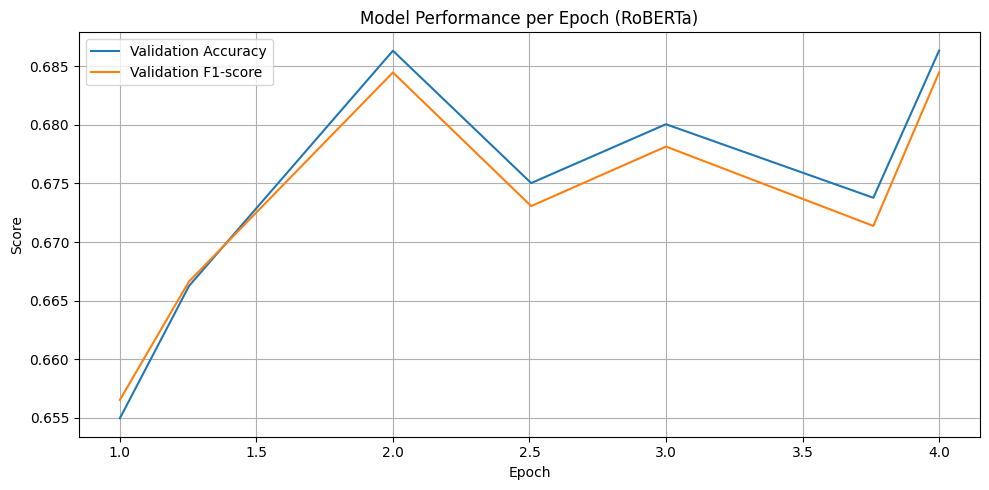

In [27]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (RoBERTa)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
model.save_pretrained("Parte1//EmotionFromText//modelo_roberta_PT_final")
tokenizer.save_pretrained("Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final")

('Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\tokenizer_config.json',
 'Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\special_tokens_map.json',
 'Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\vocab.json',
 'Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\merges.txt',
 'Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\added_tokens.json',
 'Parte1//EmotionFromText//tokenizer_modelo_roberta_PT_final\\tokenizer.json')

In [29]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6738,0.6715,0.6738,0.6722
Validação,0.6863,0.6845,0.6863,0.6863


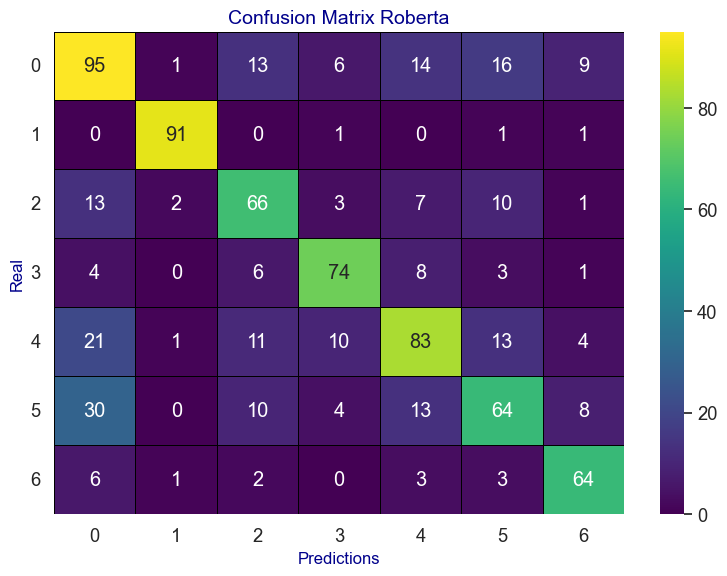

In [31]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Roberta', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## DistilBERT

In [32]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [33]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [34]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [35]:
tokenizer = DistilBertTokenizerFast.from_pretrained('adalbertojunior/distilbert-portuguese-cased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizerFast'.


In [36]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [37]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [38]:
model = DistilBertForSequenceClassification.from_pretrained('adalbertojunior/distilbert-portuguese-cased', num_labels=7)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted')
    }
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at adalbertojunior/distilbert-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.0.ffn.lin2.bias', 'transformer.layer.0.ffn.lin2.weight', 'transformer.layer.0.output_layer_norm.bias', 'transformer.layer.0.

In [39]:
trainer.train()

  0%|          | 0/11970 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.1538242101669312, 'eval_accuracy': 0.5809284818067754, 'eval_f1': 0.585077216270814, 'eval_runtime': 1.8996, 'eval_samples_per_second': 419.563, 'eval_steps_per_second': 26.321, 'epoch': 1.0}
{'loss': 1.5395, 'grad_norm': 7.141159534454346, 'learning_rate': 1.9164578111946533e-05, 'epoch': 1.25}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.003084659576416, 'eval_accuracy': 0.6235884567126725, 'eval_f1': 0.6311791834423573, 'eval_runtime': 1.9438, 'eval_samples_per_second': 410.028, 'eval_steps_per_second': 25.723, 'epoch': 2.0}
{'loss': 0.9182, 'grad_norm': 5.886695384979248, 'learning_rate': 1.8329156223893068e-05, 'epoch': 2.51}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9601499438285828, 'eval_accuracy': 0.6461731493099122, 'eval_f1': 0.6420867977037706, 'eval_runtime': 1.9184, 'eval_samples_per_second': 415.456, 'eval_steps_per_second': 26.064, 'epoch': 3.0}
{'loss': 0.6659, 'grad_norm': 8.748123168945312, 'learning_rate': 1.74937343358396e-05, 'epoch': 3.76}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9967401027679443, 'eval_accuracy': 0.6637390213299874, 'eval_f1': 0.667055182552984, 'eval_runtime': 1.9353, 'eval_samples_per_second': 411.829, 'eval_steps_per_second': 25.836, 'epoch': 4.0}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.101374626159668, 'eval_accuracy': 0.6599749058971142, 'eval_f1': 0.6620246898967375, 'eval_runtime': 2.5995, 'eval_samples_per_second': 306.601, 'eval_steps_per_second': 19.235, 'epoch': 5.0}
{'loss': 0.4917, 'grad_norm': 3.807003974914551, 'learning_rate': 1.6658312447786135e-05, 'epoch': 5.01}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.2374800443649292, 'eval_accuracy': 0.64366373902133, 'eval_f1': 0.6412657409013658, 'eval_runtime': 2.4612, 'eval_samples_per_second': 323.823, 'eval_steps_per_second': 20.315, 'epoch': 6.0}
{'loss': 0.323, 'grad_norm': 11.670373916625977, 'learning_rate': 1.5822890559732666e-05, 'epoch': 6.27}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 1.3902286291122437, 'eval_accuracy': 0.6210790464240903, 'eval_f1': 0.61653398201224, 'eval_runtime': 2.2414, 'eval_samples_per_second': 355.583, 'eval_steps_per_second': 22.308, 'epoch': 7.0}
{'train_runtime': 435.6347, 'train_samples_per_second': 439.015, 'train_steps_per_second': 27.477, 'train_loss': 0.7317029309025214, 'epoch': 7.0}


TrainOutput(global_step=2793, training_loss=0.7317029309025214, metrics={'train_runtime': 435.6347, 'train_samples_per_second': 439.015, 'train_steps_per_second': 27.477, 'total_flos': 1477971192096000.0, 'train_loss': 0.7317029309025214, 'epoch': 7.0})

In [40]:
trainer.evaluate()

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.9967401027679443,
 'eval_accuracy': 0.6637390213299874,
 'eval_f1': 0.667055182552984,
 'eval_runtime': 2.8008,
 'eval_samples_per_second': 284.559,
 'eval_steps_per_second': 17.852,
 'epoch': 7.0}

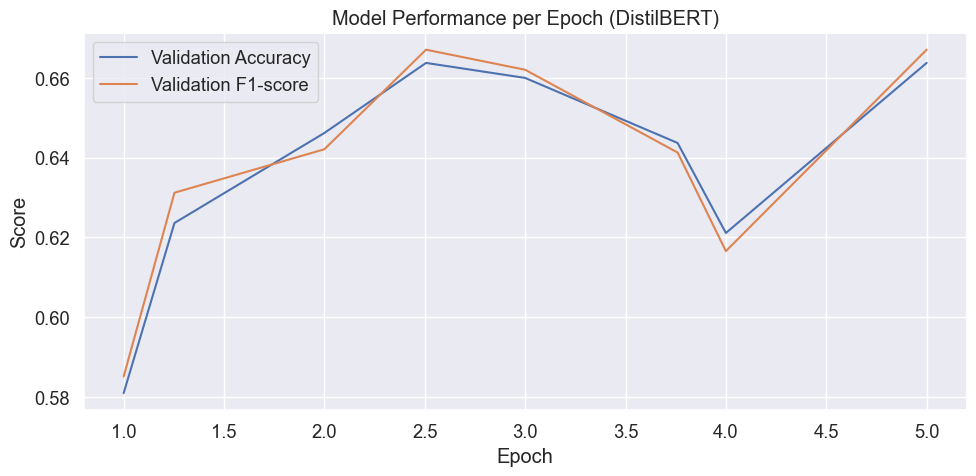

In [41]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (DistilBERT)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
model.save_pretrained("Parte1//EmotionFromText//modelo_distilbert_PT_final")
tokenizer.save_pretrained("Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final")

('Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final\\tokenizer_config.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final\\special_tokens_map.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final\\vocab.txt',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final\\added_tokens.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_PT_final\\tokenizer.json')

In [43]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [44]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6274,0.6270,0.6274,0.6474
Validação,0.6637,0.6671,0.6637,0.6861


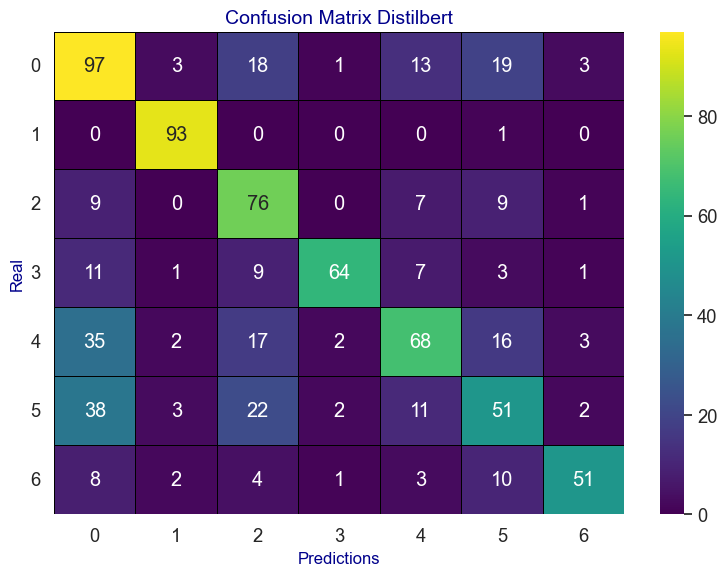

In [45]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Distilbert', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()